In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/minsu/Desktop/abalone.csv', index_col=0)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [9]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Sex Count')

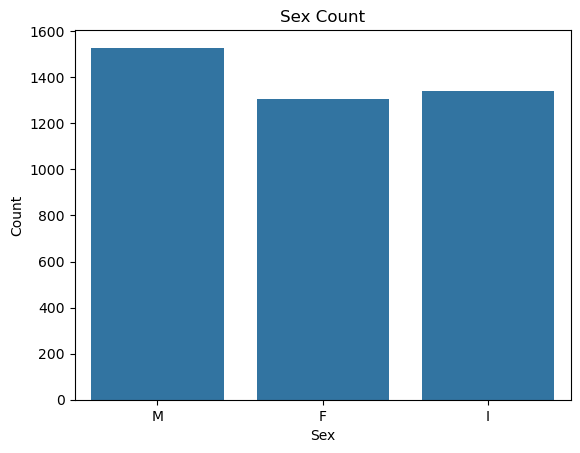

In [11]:
sns.countplot(data=df, x="Sex")

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Count")

Text(0.5, 1.0, 'Rings Count')

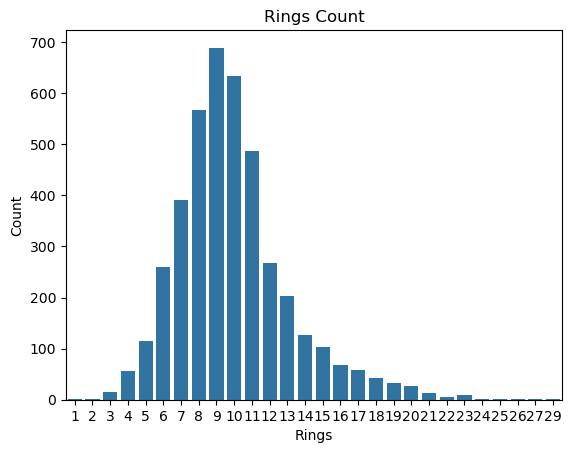

In [13]:
sns.countplot(data=df, x="Rings")

plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings Count")

# 전복 데이터셋 준비

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/minsu/Desktop/abalone.csv', index_col=0)

df['Rings_category'] = pd.cut(df['Rings'], bins=[0, 7, 10, float('inf')], labels=[0, 1, 2])

df = pd.get_dummies(df, columns=['Sex'])

X = df.drop(['Rings', 'Rings_category'], axis=1)
y = df['Rings_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Classification

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train_scaled, y_train)

y_pred = rfc_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'RF Classification Accuracy: {accuracy:.2f}')

RF Classification Accuracy: 0.69


# ML Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train_scaled, y_train)

y_pred = rfr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f'RF Regression MSE: {mse:.2f}')

RF Regression MSE: 2.76


# Neural Network Classification

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('/Users/minsu/Desktop/abalone.csv', index_col=0)

y = pd.cut(df['Rings'], bins=[0, 7, 10, float('inf')], labels=[0, 1, 2])
y = to_categorical(y)

df = pd.get_dummies(df, columns=['Sex'])

X = df.drop(['Rings'], axis=1)
           
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax') # 다중 분류
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'DL Classification Accuracy: {accuracy:.2f}')

2024-09-12 01:03:44.169977: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-12 01:03:44.170002: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-12 01:03:44.170008: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-12 01:03:44.170332: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 01:03:44.170349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2024-09-12 01:03:44.705215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5282 - loss: 0.9732 - val_accuracy: 0.6457 - val_loss: 0.7447
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6673 - loss: 0.7150 - val_accuracy: 0.6816 - val_loss: 0.7006
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6377 - loss: 0.7156 - val_accuracy: 0.6771 - val_loss: 0.6778
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6693 - loss: 0.6874 - val_accuracy: 0.7145 - val_loss: 0.6775
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7016 - loss: 0.6525 - val_accuracy: 0.7085 - val_loss: 0.6552
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6928 - loss: 0.6572 - val_accuracy: 0.7190 - val_loss: 0.6486
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6777 - loss: 0.6616 - val_accuracy: 0.7160 - val_loss: 0.6479
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6979 - loss: 0.6459 - val_accuracy: 0.7190 - val_loss: 0.

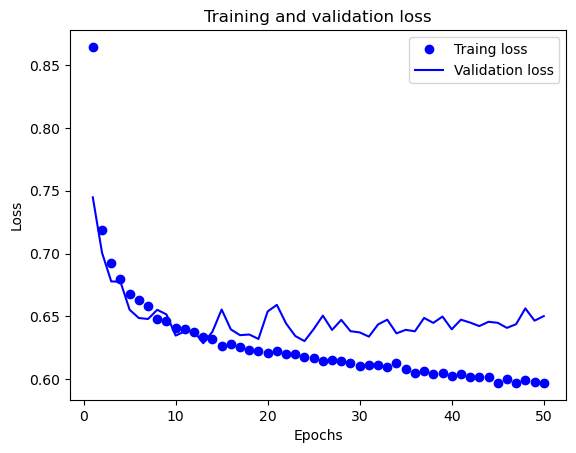

In [31]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Traing loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

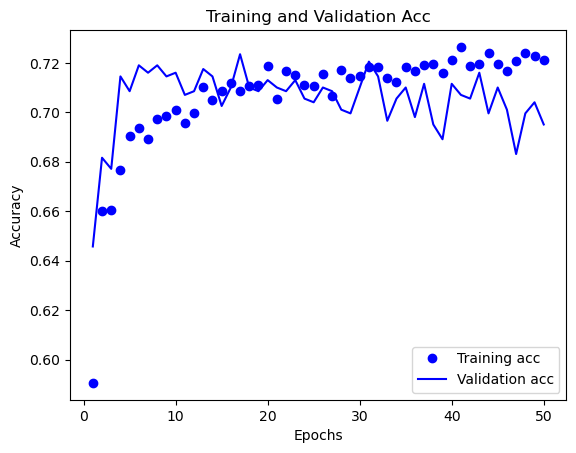

In [35]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
# 데이터 로드
df = pd.read_csv('/Users/minsu/Desktop/abalone.csv', index_col=0)

# 'Sex' 열을 원-핫 인코딩하여 숫자형으로 변환
df = pd.get_dummies(df, columns=['Sex'])

# 독립 변수와 종속 변수 분리
X = df.drop(['Rings'], axis=1)  # 독립 변수
y = df['Rings']  # 종속 변수 (예측 대상)

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

mse = model.evaluate(X_test_scaled, y_test)
print(f'DL Regression MSE: {mse:.2f}')

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 66.6363 - val_loss: 12.0493
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10.7732 - val_loss: 5.2175
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.8941 - val_loss: 4.7166
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9525 - val_loss: 4.5064
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3911 - val_loss: 4.4106
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.8698 - val_loss: 4.3284
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0246 - val_loss: 4.2849
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.2537 - val_loss: 4.2863
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.9338 - val_loss: 4.1481
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0822 - val_loss: 4.1071
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8201 - val_loss: 4.2873
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6219 - val